In [17]:
# https://habr.com/ru/company/microsoft/blog/514814/

In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [41]:
def plot_dots(im,dots):
    img = np.zeros_like(im)
    for x in dots:
        cv2.circle(img,(int(x[0]),int(x[1])),1,(255,0,0))

In [ ]:
def slice(img):
    dy,dx = img.shape
    y = 0
    while y+char_h<dy:
        x=0
        while x+char_w<dx:
            # Корректируем сдвиг по x
            while np.max(img[y:y+char_h,x])!=0:
                x+=1
            while np.max(img[y:y+char_h,x+char_w])!=0:
                x-=1
            # Пропускаем полностью пустые символы
            if np.max(img[y:y+char_h,x:x+char_w])>0:
                yield img[y:y+char_h,x:x+char_w]
            x+=char_w
        y+=char_h

In [58]:
def photo(name):
    im = cv2.imread(name)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    
    im = cv2.blur(im,(3,3))
    im = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                           cv2.THRESH_BINARY_INV, 5, 4)
    im = cv2.medianBlur(im, 3)
    _,im = cv2.threshold(im, 0, 255, cv2.THRESH_OTSU)
    im = cv2.GaussianBlur(im, (3,3), 0)
    _,im = cv2.threshold(im, 0, 255, cv2.THRESH_OTSU)
    
    orb = cv2.ORB_create(6000)
    f,d = orb.detectAndCompute(im,None)
    
    pts = [x.pt for x in f]
    plot_dots(im,pts)
    
    min_x, min_y, max_x, max_y = \
   [int(f([z[i] for z in pts])) 
       for f in (min,max) for i in (0,1)]
    
    off = 5
    src_pts = np.array([(min_x-off,min_y-off),(min_x-off,max_y+off),
                    (max_x+off,min_y-off),(max_x+off,max_y+off)])
    dim = 500
    dst_pts = np.array([(0,0),(0,dim),(dim,0),(dim,dim)])
    h,m = cv2.findHomography(src_pts,dst_pts)
    trim = cv2.warpPerspective(im,h,(dim,dim))
    
    char_h = 22
    char_w = 16
    
    sliced = list(slice(cropped))
    
    fig=plt.figure(figsize=(8, 8))
    columns = 6
    rows = 5
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        plt.imshow(sliced[i])
    plt.show()

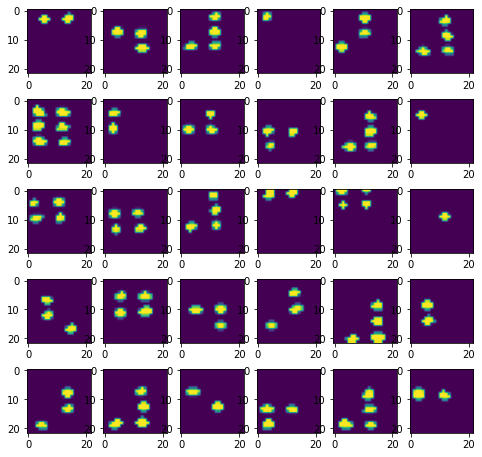

In [59]:
photo('Photo_Turlom_C1_2.jpeg')

In [64]:
def symb(name):
    sym = cv2.imread('eng/a.PNG')
    sym = cv2.bitwise_not(sym)
    sym = cv2.cvtColor(sym,cv2.COLOR_BGR2GRAY)
    plt.imshow(sym)

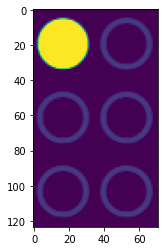

In [65]:
symb('eng/a.PNG')